# Introduction

The goal for this project is to analyze biodiversity data from the National Parks Service, specifically around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:** provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

To ensure the success of the project, it's important to establish a clear scope that outlines the goals, data, analysis, evaluation, and expected output of the project. The following sections will define each of these components in detail to guide the project process and ensure it aligns with the project objectives.

### Project Goals

The goal of this project is to analyze data from the National Parks Service about endangered species in various parks and investigate any patterns or themes related to the types of species that become endangered. As a biodiversity analyst for the National Parks Service, the objective is to understand the conservation statuses of the species and their relationship to the parks. To achieve this, the following questions will be posed and answered through data analysis:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to become endangered?
- Are there any significant differences in the conservation status of species?
- Which species are most prevalent, and what is their distribution among parks?

### Data 

The data required for this project is provided by the National Parks Service and includes two datasets. The first dataset is a CSV file containing information about each species, while the second dataset consists of observations of species with park locations. This data will be cleaned, analyzed, and visualized to answer the research questions and achieve the project goals.

### Analysis 

The data analysis will involve cleaning and processing the datasets to extract relevant information for the project goals. Descriptive statistics and data visualization techniques will be employed to gain a better understanding of the data. Additionally, statistical inference will be used to test the significance of the observed values. Key metrics that will be computed include:

1. Distributions of conservation status for species.
2. Counts of each species and their prevalence in different parks.
3. Relationships between species and their conservation status.
4. Comparison of the conservation status of different species.
5. Observations of species in parks and their distribution.

### Evaluation

The evaluation section will ensure that the project goals have been achieved by checking if the output of the analysis corresponds to the questions posed in the project goals section. It will also reflect on what has been learned through the project, any limitations, and if any of the questions were unable to be answered. Additionally, this section will assess if any of the analysis could have been done using different methodologies.

### Output

The output of this project will include a detailed report of the findings from the data analysis, along with visualizations that clearly demonstrate the trends and patterns observed in the data. This report will provide insights into the conservation status of species in different parks and can be used by the National Parks Service to make informed decisions about endangered species conservation.

In [116]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Data

#### species

`species_info.csv` contains information on the different species in the National Parks. The columns included are:

- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

#### observations

`Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [117]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [118]:
observations = pd.read_csv("Observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

`species` has 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [119]:
print("Species shape: {}".format(species.shape))
print("Observations shape: {}".format(observations.shape))

Species shape: (5824, 4)
Observations shape: (23296, 3)


## Exploring the Data

#### Species Data Frame

In [120]:
print("Number of Species: {}".format(species.scientific_name.nunique()))
print("Number of Categories: {}".format(species.category.nunique()))

species.groupby("category").size()

Number of Species: 5541
Number of Categories: 7


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [121]:
print("Number of Conservation Statuses: {}".format(species.conservation_status.nunique()))
print("Number of Unique Conservation Statuses: {}".format(species.conservation_status.unique()))
print("Number of N/A Conservation Statuses: {}".format(species.conservation_status.isna().sum()))

species.groupby("conservation_status").size()

Number of Conservation Statuses: 4
Number of Unique Conservation Statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Number of N/A Conservation Statuses: 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

#### Observations Data Frame

In [122]:
print("Number of Parks: {}".format(observations.park_name.nunique()))
print("Number of Unique Parks: {}".format(observations.park_name.unique()))
print("Number of Observations: {}".format(observations.observations.sum()))

Number of Parks: 4
Number of Unique Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of Observations: 3314739


## Analysis

#### What is the distribution of conservation status for species?

In [123]:
species.fillna("No Intervention", inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [124]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


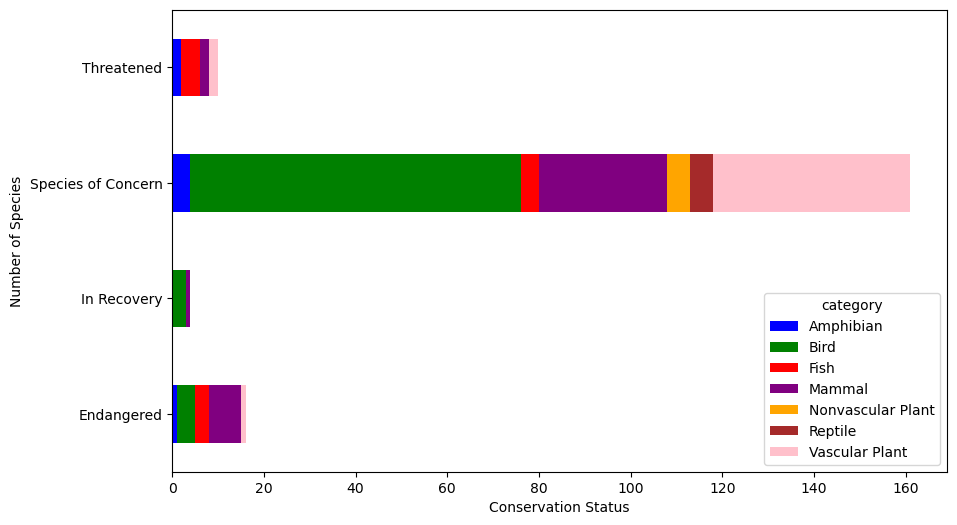

<Figure size 640x480 with 0 Axes>

In [134]:
ax = conservationCategory.plot.barh(figsize=(10,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()
plt.clf()

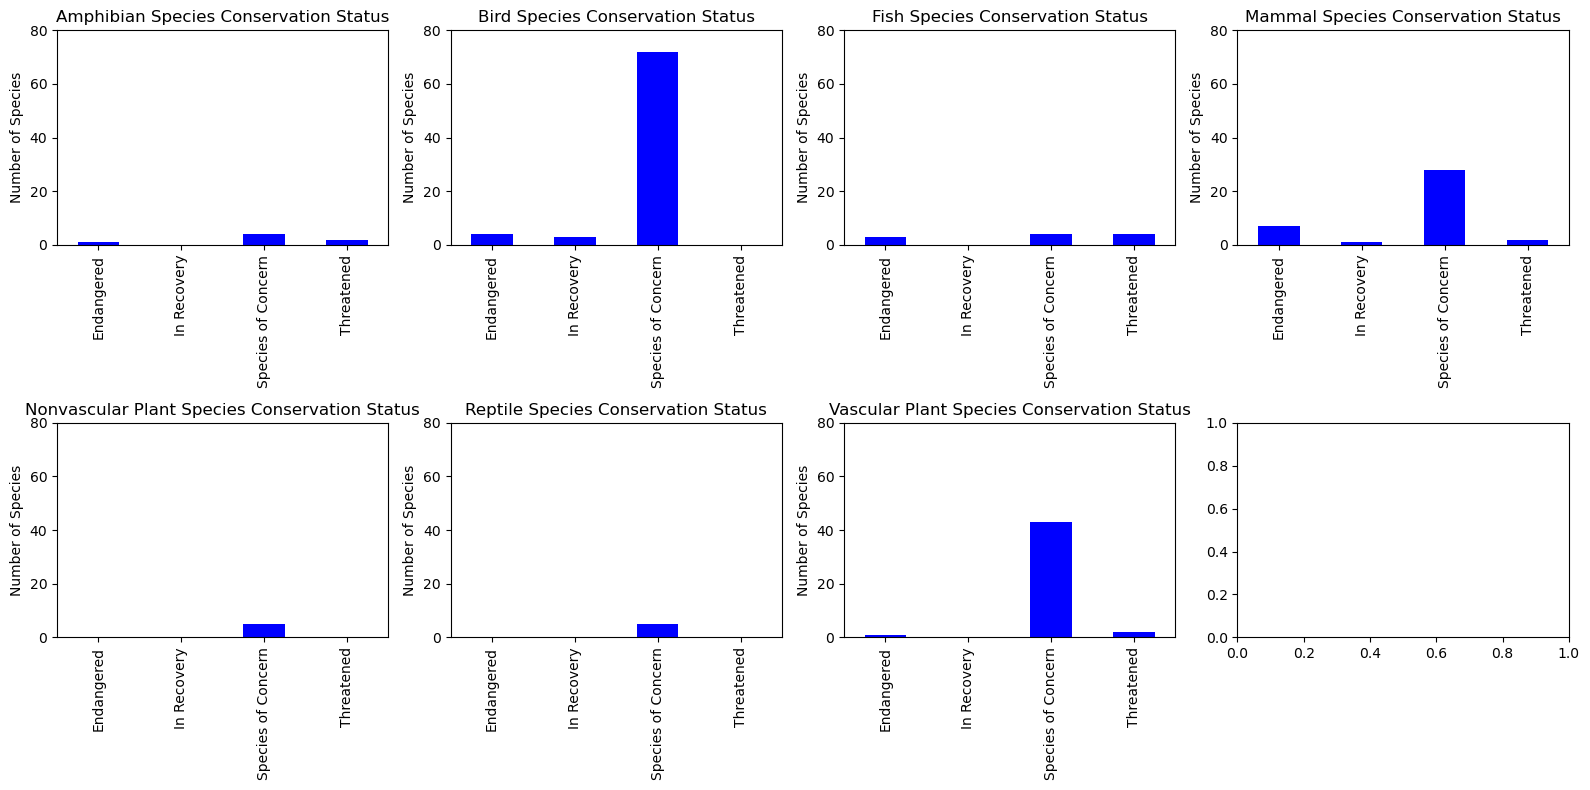

<Figure size 640x480 with 0 Axes>

In [140]:
categories = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axs = axs.flatten()

for i, category in enumerate(categories):
    ax = conservationCategory[category].plot(kind='bar', stacked=True, ax=axs[i])
    ax.set_title(f"{category} Species Conservation Status")
    ax.set_xlabel("")
    ax.set_ylabel("Number of Species")
    ax.set_ylim([0, 80])
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
plt.clf()

#### Are certain types of species more likely to be endangered?

In [156]:
species['is_protected'] = species.conservation_status != 'No Intervention'

category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected', index='category', values='scientific_name')\
                        .reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [163]:
category_counts['percent_protected'] = category_counts.protected /\
                                            (category_counts.protected + category_counts.not_protected) * 100

category_counts['percent_protected'] = category_counts['percent_protected'].map('{:.2f}%'.format)

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86%
1,Bird,413,75,15.37%
2,Fish,115,11,8.73%
3,Mammal,146,30,17.05%
4,Nonvascular Plant,328,5,1.50%
5,Reptile,73,5,6.41%
6,Vascular Plant,4216,46,1.08%


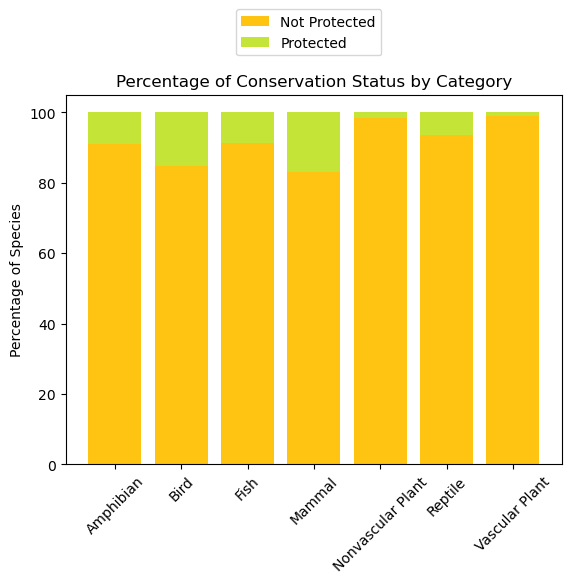

<Figure size 640x480 with 0 Axes>

In [175]:
colors = ['#FFC312', '#C4E538']

fig, ax = plt.subplots()
ax.bar(category_counts['category'], category_counts['percent_not_protected'], color=colors[0], label='Not Protected')
ax.bar(category_counts['category'], category_counts['percent_protected'], bottom=category_counts['percent_not_protected'], color=colors[1], label='Protected')

ax.set_xlabel('')
ax.set_ylabel('Percentage of Species')
plt.xticks(rotation=45)
ax.set_title('Percentage of Conservation Status by Category')

ax.legend(bbox_to_anchor =(0.65, 1.25))

plt.show()
plt.clf()

#### Are the differences between species and their conservation status significant?

In [179]:
from scipy.stats import chi2_contingency

contingency_mammal_bird = [[30, 146],
                          [75, 413]]

chi2, p_value, dof, expected = chi2_contingency(contingency_mammal_bird)

print("Chi-squared test statistic:", chi2)
print("P-value:", p_value)

Chi-squared test statistic: 0.1617014831654557
P-value: 0.6875948096661336


In [181]:
contingency_mammal_reptile = [[30, 146],
                              [5, 73]]

chi2, p_value, dof, expected = chi2_contingency(contingency_mammal_reptile)
print("Chi-squared test statistic:", chi2)
print("P-value:", p_value)

Chi-squared test statistic: 4.289183096203645
P-value: 0.03835559022969898


In [184]:
contingency_reptile_fish = [[5, 73],
                            [11, 115]]

chi2, p_value, dof, expected = chi2_contingency(contingency_reptile_fish)
print("Chi-squared test statistic:", chi2)
print("P-value:", p_value)

Chi-squared test statistic: 0.10955400981996731
P-value: 0.7406524615907095


In [185]:
contingency_fish_amphibian = [[11, 115],
                              [7, 72]]

chi2, p_value, dof, expected = chi2_contingency(contingency_fish_amphibian)
print("Chi-squared test statistic:", chi2)
print("P-value:", p_value)

Chi-squared test statistic: 0.0
P-value: 1.0


<AxesSubplot:xlabel='Protected-Unprotected', ylabel='Species'>

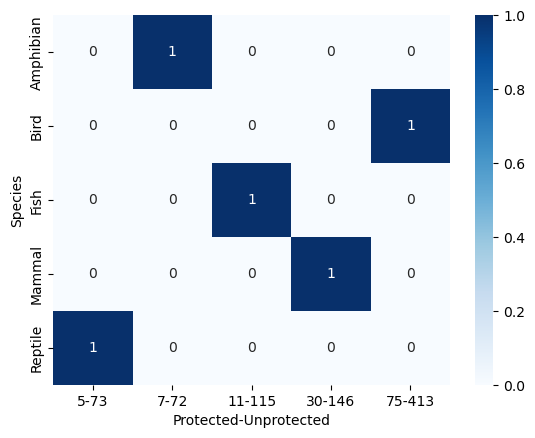

In [193]:
import pandas as pd

data = {'Species': ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian'],
        'Protected': [30, 75, 5, 11, 7],
        'Unprotected': [146, 413, 73, 115, 72]}

df = pd.DataFrame(data)
ct = pd.crosstab(df['Species'], [df['Protected'], df['Unprotected']])
sns.heatmap(ct, cmap='Blues', annot=True, fmt='d')

From this heatmap we can conclude:

+ **Mammals** and **birds** have the highest counts of both protected and unprotected species.
+ **Reptiles** have the lowest count of protected species and the second lowest count of unprotected species.
+ There is no significant association between the protected status and the species category for most species categories. 
+ **Mammals** are shown to have a statistically significant higher rate of needed protection compared to **reptiles**.

#### Which animal is most prevalent and what is their distribution amongst parks?

In [210]:
from itertools import chain
import string

def remove_punctutation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

mammal_names = species[species.category == "Mammal"]\
                    .common_names\
                    .apply(remove_punctutation)\
                    .str.split().tolist()

print(len(mammal_names))
mammal_names[:5]

214


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

In [209]:
clean_rows = [list(set(name)) for name in mammal_names]

print(len(clean_rows))
clean_rows[:5]

214


[['Vole', 'RedBacked', 'Gappers'],
 ['American', 'Bison'],
 ['Domestic', 'Domesticated', 'Cattle', 'Feral', 'Aurochs'],
 ['Sheep', 'Domestic', 'Feral', 'Mouflon', 'Red'],
 ['Or', 'Wapiti', 'Elk']]

In [215]:
name_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))

print(len(name_list))

547


In [220]:
name_count = []

for name in name_list:
    count = name_list.count(name)
    name_count.append((name, count))

pd.DataFrame(set(name_count), columns =['Name', 'Count']).sort_values("Count", ascending = False)

,Name,Count
192,Bat,23
198,Shrew,18
23,Myotis,17
40,Mouse,16
6,Chipmunk,13
...,...,...
76,Golden,1
73,Boar,1
71,Shadow,1
70,Pacific,1


In [228]:
species['bat'] = species.common_names.str.contains('Bat', regex = True)
species[species.bat]

,category,scientific_name,common_names,conservation_status,is_protected,bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [229]:
bat_observations = observations.merge(species[species.bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
147,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
148,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
149,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
150,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [230]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3625
1,Great Smoky Mountains National Park,2513
2,Yellowstone National Park,8901
3,Yosemite National Park,5104


In [231]:
bat_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
bat_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1788
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1401
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4583
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2663
7,Yosemite National Park,True,2441


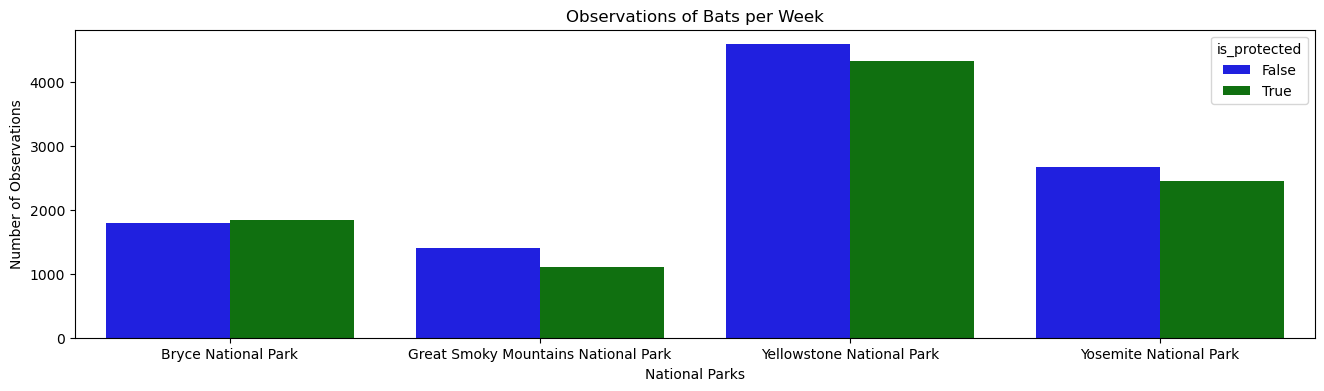

In [241]:
plt.figure(figsize=(16, 4))
sns.barplot(x=bat_by_park.park_name, y= bat_by_park.observations, hue=bat_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

+ What is the distribution of conservation status for species?
    + The vast majority of species are in the **concerned** conservation status. Only **birds** and **mammals** have a small percentage of their species **in recovery** concervation status.
    
+ Are certain types of species more likely to be endangered?
    + Mammals and Birds had the highest percentage of being in protection. While **nonvascular and vascular plants** and **reptiles** have the lowest percentage.
    
+ Are the differences between species and their conservation status significant?
    + While there was no significant association between the protected status and the species category for most species categories, **mammals** are shown to have a statistically significant higher rate of needed protection compared to **reptiles**.
    
+ Which animal is most prevalent and what is their distribution amongst parks?
    + Yhe study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.